# An introduction to python exceptions

A Python program terminates as sson as it encounters an error.

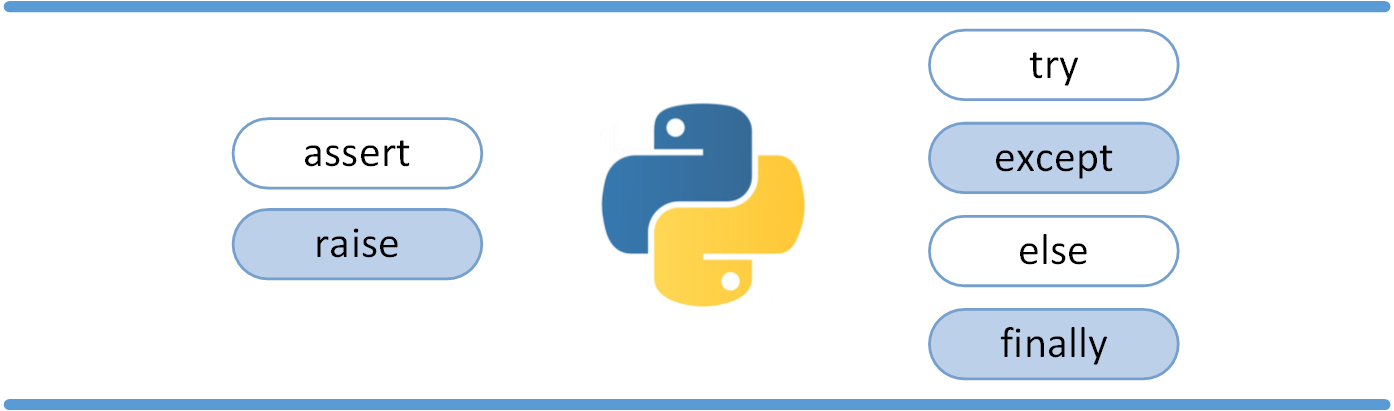

## Exception VS Syntax Errors

Syntax errors occur when the parser detects an incorrect statement. Observe the following example:

In [1]:
print( 0 / 0 ))

SyntaxError: invalid syntax (<ipython-input-1-c3931f671051>, line 1)

The arrow indicates where the parser ran into the syntax error. In this example, there was one bracket too many. Remove it and run your code again:

In [2]:
print( 0 / 0)

ZeroDivisionError: division by zero

This time, you ran into an **exception error**. This type of error occurs whenever syntactically correct Python code results in an error. The last line of the message indicated what type of exception error you ran into.

Instead of showing the message exception error, Python details what type of exception error was encountered. In this case, it was a ZeroDivisionError. Python comes with various [built-in exceptions](https://docs.python.org/3/library/exceptions.html) as well as the possibility to create self-defined exceptions.

## Raising an exception

We can use **raise** to throw an exception if a condition occurs. The statement can be complemented with a custom exception.

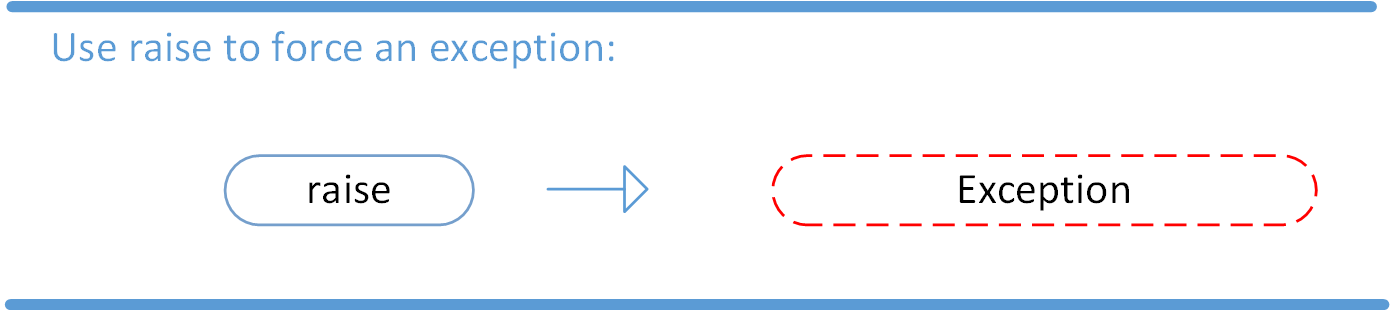

In [3]:
x = 10
if x > 5:
    raise Exception('x should not exceed 5. The value of x was: {}'.format(x))

Exception: x should not exceed 5. The value of x was: 10

## The AssertionError Exception

Instead of waiting for a program to crash midway, you can also start by making an assertion in Python. We assert that a certain condition is met. If this condition turns out to be True, then that is excellent! The program can continue. If the condition turns out to be False, you can have the program throw an AssertionError exception.

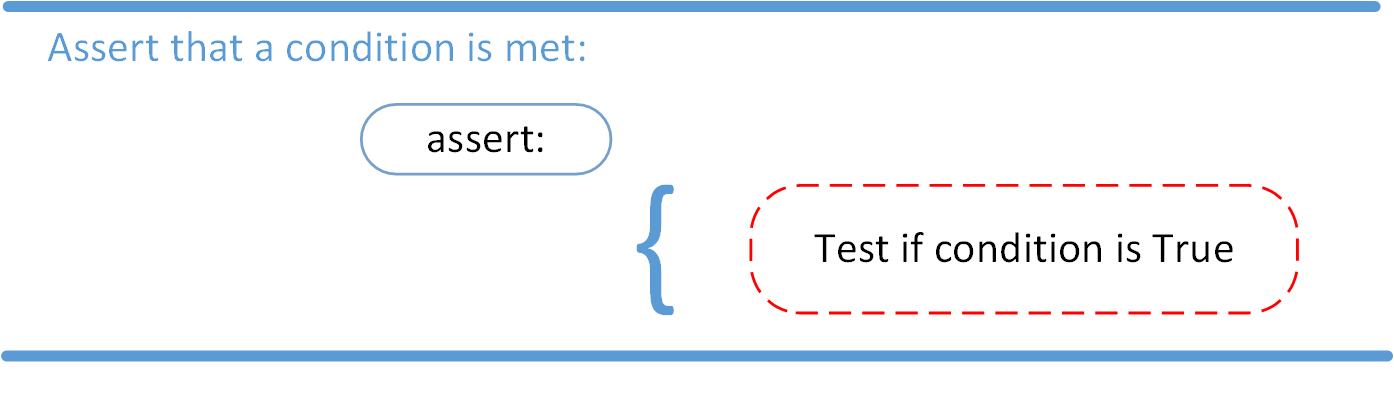

In this example, throwing an AssertionError exception is the last thing that the program will do. The program will come to halt and will not continue. What if that is not what you want?

## The try and except Block: Handling Exceptions

The try and except block in Python is used to catch and handle exceptions. Python executes code following the try statement as a “normal” part of the program. The code that follows the except statement is the program’s response to any exceptions in the preceding try clause.

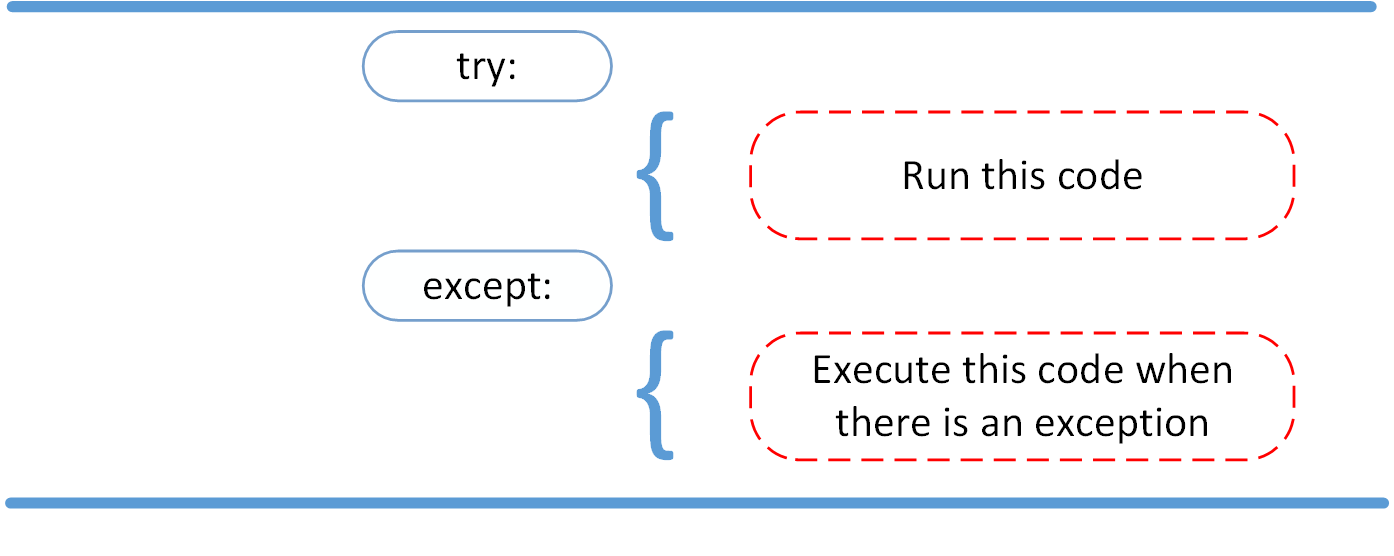

In [8]:
import sys

def linux_interaction():
    assert ('linux' in sys.platform), "Function can only run on Linux systems."
    print('Doing something.')
try:
    linux_interaction()
except:
    print('Linux function was not executed')


Doing something.


In [9]:
try:
    linux_interaction()
except AssertionError as error:
    print(error)
    print('The linux_interaction() function was not executed')

Doing something.


In [10]:
try:
    with open('file.log') as file:
        read_data = file.read()
except FileNotFoundError as fnf_error:
    print(fnf_error)

[Errno 2] No such file or directory: 'file.log'


**Warning**: Catching Exception hides all errors…even those which are completely unexpected. This is why you should avoid bare except clauses in your Python programs. Instead, you’ll want to refer to specific exception classes you want to catch and handle. You can learn more about why this is a good idea in this tutorial.

In [11]:
try:
    linux_interaction()
    with open('file.log') as file:
        read_data = file.read()
except FileNotFoundError as fnf_error:
    print(fnf_error)
except AssertionError as error:
    print(error)
    print('Linux linux_interaction() function was not executed')

Doing something.
[Errno 2] No such file or directory: 'file.log'


### Key takeaways:

* A try clause is executed up until the point where the first exception is encountered.
* Inside the except clause, or the exception handler, you determine how the program responds to the exception.
* You can anticipate multiple exceptions and differentiate how the program should respond to them.
* **Avoid using bare except clauses.**

## The else clause

In Python, using the **else** statement, you can instruct a program to execute a certain block of code only in the absence of exceptions.

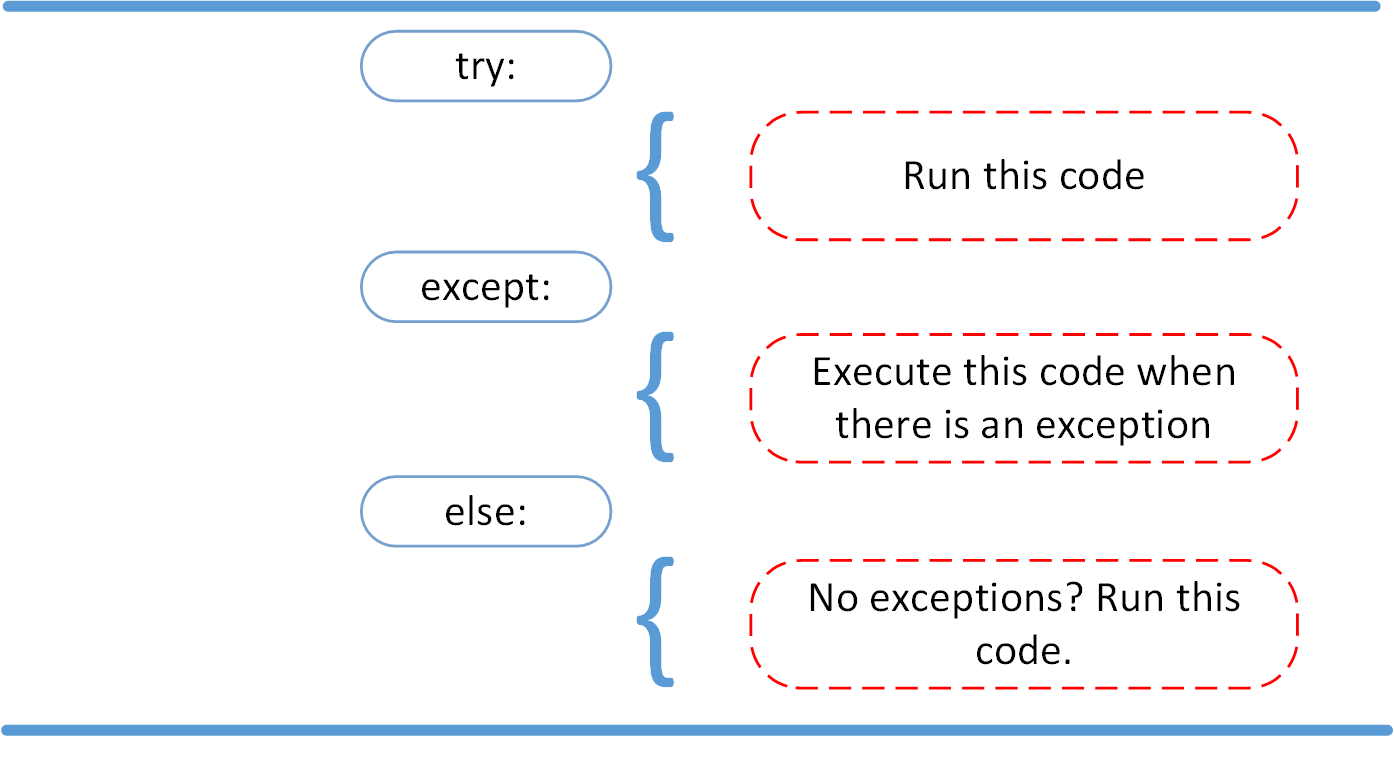

In [12]:
try:
    linux_interaction()
except AssertionError as error:
    print(error)
else:
    print('Executing the else clause.')

Doing something.
Executing the else clause.


Because the program did not run into any exceptions, the else clause was executed.

You can also try to run code inside the else clause and catch possible exceptions there as well:

In [15]:
try:
    linux_interaction()
except AssertionError as error:
    print(error)
else:
    try:
        with open('file.log') as file:
            read_data = file.read()
    except FileNotFoundError as fnf_error:
        print(fnf_error)

Doing something.
[Errno 2] No such file or directory: 'file.log'


## Cleaning Up After Using finally

Imagine that you always had to implement some sort of action to clean up after executing your code. Python enables you to do so using the finally clause.

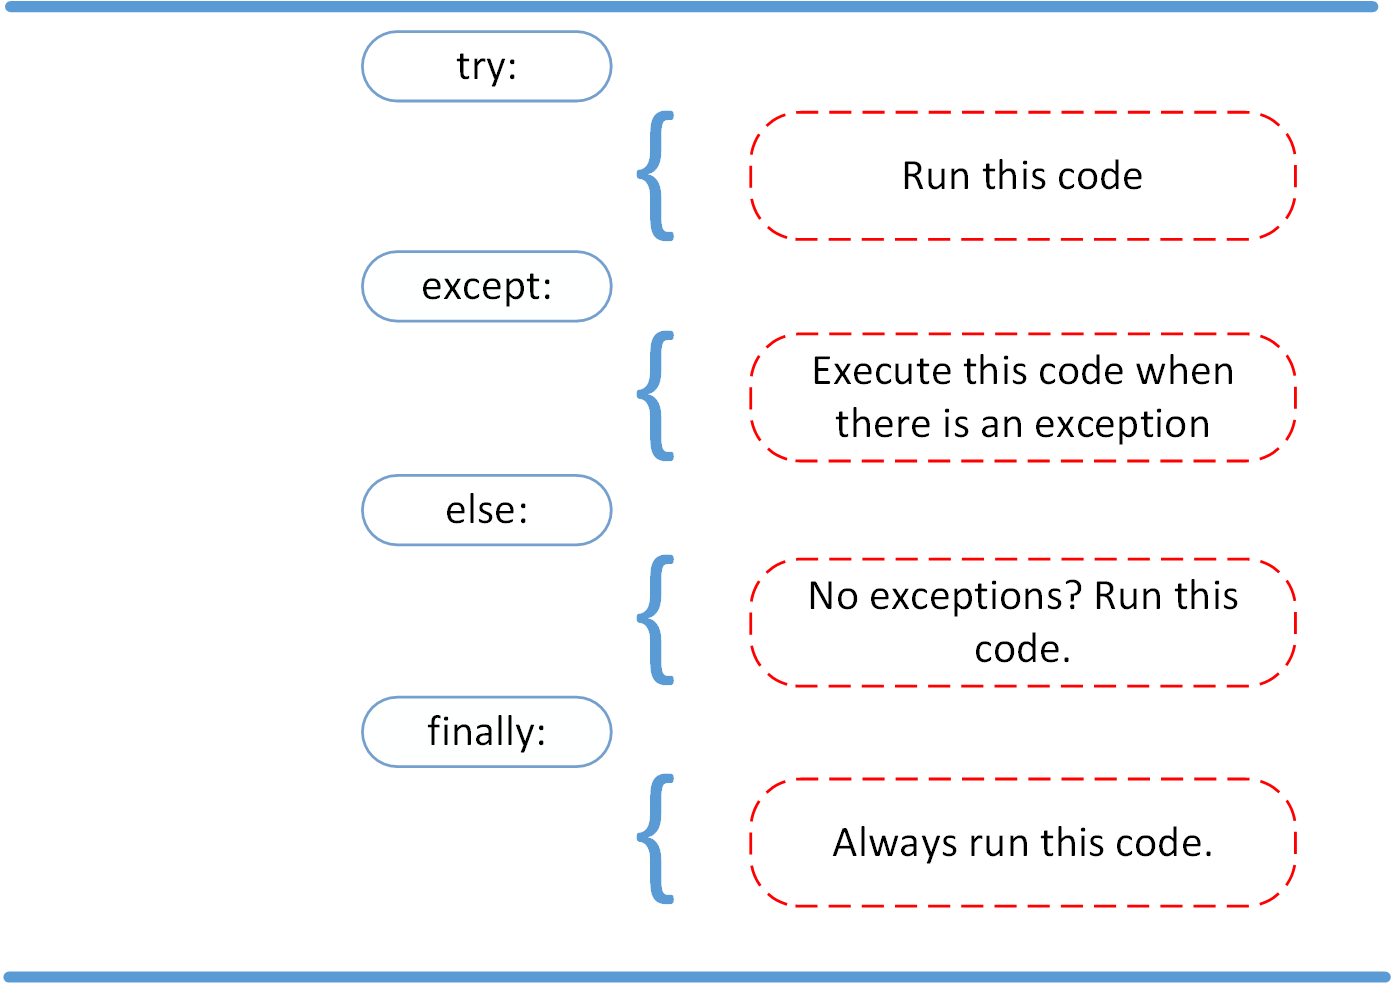

In [16]:
try:
    linux_interaction()
except AssertionError as error:
    print(error)
else:
    try:
        with open('file.log') as file:
            read_data = file.read()
    except FileNotFoundError as fnf_error:
        print(fnf_error)
finally:
    print('Cleaning up, irrespective of any exceptions.')

Doing something.
[Errno 2] No such file or directory: 'file.log'
Cleaning up, irrespective of any exceptions.


In the previous code, everything in the finally clause will be executed. It does not matter if you encounter an exception somewhere in the try or else clauses.

## Summing Up

* raise allows you to throw an exception at any time.
* assert enables you to verify if a certain condition is met and throw an exception if it isn’t.
* In the try clause, all statements are executed until an exception is encountered.
* except is used to catch and handle the exception(s) that are encountered in the try clause
* else lets you code sections that should run only when no exceptions are encountered in the try clause.
* finally enables you to execute sections of code that should always run, with or without any previously encountered exceptions.

# Source

* https://realpython.com/python-exceptions/